# AfterWork Data Science: Introduction to Machine Learning

## 1. Defining the Question

### a) Understanding the context 

Beta Bank customers are leaving: little by little, chipping away every month. The bankers
figured out it’s cheaper to save the existing customers rather than to attract new ones.

The bank has shared the existing data and would like to develop a model that would save them in retaining the existing customers.


### b) Data Analysis Question

To predict whether a customer would be exiting the bank soon or not.

### c) Defining the Metric for Success

the model should have an F1 score of 0.59 and above

## 2. Reading the Data

In [202]:
# Importing our libraries
# ---
# import Pandas for data manipulation
import pandas as pd
#improt numpy for arithimetic oprations
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score


In [203]:
# Load the data below
# --- 
# Dataset url =  https://bit.ly/2ODZvLCHRDataset

# reading the data and storing it in a dataframe named beta_df

beta_df = pd.read_csv("https://bit.ly/2XZK7Bo")

# 

In [204]:
# Checking the first 5 rows of data
# ---
beta_df.head()
#

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [205]:
# Checking the last 5 rows of data
# ---
beta_df.tail()
#

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [206]:
# Sample 10 rows of data
# ---
beta_df.sample(10)
#

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9977,9978,15579969,Mancini,683,France,Female,32,9.0,0.00,2,1,1,24991.92,0
7060,7061,15594305,Rizzo,712,France,Female,32,1.0,0.00,2,1,0,1703.58,0
7996,7997,15709639,Wilson,717,France,Female,22,5.0,112465.06,1,1,1,92977.75,0
5008,5009,15768359,Akhtar,534,France,Male,36,4.0,120037.96,1,1,0,36275.94,0
4590,4591,15680167,Thomson,635,France,Female,78,NaN,47536.40,1,1,1,119400.08,0
2390,2391,15599251,Chung,602,Germany,Male,32,7.0,184715.86,2,1,0,113781.99,0
4324,4325,15577970,Alexeeva,489,France,Male,34,NaN,0.00,1,0,0,43540.59,0
6285,6286,15655229,Craig,850,Germany,Female,35,7.0,114285.20,1,0,1,129660.59,0
5120,5121,15701176,Brown,663,France,Male,26,NaN,141462.13,1,1,0,440.20,0
9753,9754,15705174,Chiedozie,656,Germany,Male,68,7.0,153545.11,1,1,1,186574.68,0



we have missing data o tenure

In [207]:
# Checking number of rows and columns
# ---

beta_df.shape
#  

(10000, 14)

# Observation:
we have a mixture of objects and integers

##  Data Preparation and Cleaning

In [208]:
# Checking datatypes and missing entries of all the variables
# ---
#

beta_df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

We observe the following from our dataset:
1. we have missing data on Tenure. We can replace this with the mean of tenure 


In [209]:
# replacing the missing Tenure data with mean value


beta_df['Tenure'].fillna(value=beta_df['Tenure'].mean(), inplace=True)

beta_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing data on now

In [210]:
# Checking datatypes
# ---
beta_df.dtypes
# 

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [211]:
beta_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


# Observation
We have a mixture of objects,floats and integers. Since our modeling data need to be numeric and gender is a critical data set, we need to reconfigure the gender values. Female = 0 and male = 1


In [212]:
# replace Male with 1 and female with 0 on Tenure column
beta_df['Gender'] = beta_df['Gender'].replace('Male',1)
beta_df['Gender'] = beta_df['Gender'].replace('Female',0)
beta_df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
208,209,15684181,Hackett,643,France,1,45,5.0,0.00,1,1,0,142513.50,1
7983,7984,15628272,Singh,774,France,0,36,9.0,114997.42,1,1,0,75304.09,0
1070,1071,15648075,Hebert,686,Germany,0,47,5.0,170935.94,1,1,0,173179.79,1
4026,4027,15606641,Beggs,762,Germany,1,56,10.0,100260.88,3,1,1,77142.42,1
4852,4853,15574137,Ch'in,687,Spain,1,35,3.0,0.00,2,1,1,176450.19,0
224,225,15568748,Poole,671,Germany,1,45,6.0,99564.22,1,1,1,108872.45,1
4386,4387,15621520,Tang,783,Germany,0,42,2.0,139707.28,1,1,0,2150.22,0
1806,1807,15683471,Hansen,691,France,1,38,7.0,0.00,2,0,0,81617.40,0
5551,5552,15800251,Elder,583,Germany,0,26,10.0,72835.56,2,1,0,96792.15,0
6787,6788,15596074,Keating,502,France,1,37,10.0,0.00,1,1,1,76642.68,0


In [213]:
#recheck the data types
beta_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [214]:
# Standardizing your dataset i.e. variable renaming
# 
# convert all column headers to lower case

beta_df.columns =  beta_df.columns.str.lower()
beta_df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [215]:
# Checking how many duplicate rows are there in the data
# ---
beta_duplicated_df =beta_df[beta_df.duplicated()]
beta_duplicated_df

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited


We observe the following from our dataset:

No duplicates



In [216]:
#checking the shape of the clean data
beta_df.shape

(10000, 14)


## Solution Implementation

developing models that would predict the probability of a customer exit


### Defining our features and target

In [217]:
#checking columns
beta_df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [218]:
#defining features
features = beta_df.drop(['rownumber','customerid','surname', 'geography'], axis=1)

#defining target - exited
target = beta_df['exited']

features.head()

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,0,43,2.0,125510.82,1,1,1,79084.10,0


In [219]:

# spliting the data to train and valid
x_train, x_valid, y_train,y_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# checking the size of exited(1) and retained customers(0)
features_zeros = x_train[y_train == 0]
features_ones = x_train[y_train == 1]
target_zeros = y_train[y_train == 0]
target_ones = y_train[y_train == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(5998, 10)
(1502, 10)
(5998,)
(1502,)


# Observation
there is an imbalance noted where one data set is smaller than the zeros data set
we shall use upsampling and downsampling to correct the imbalance and in both we test accuracy

# Using Logistic regression modeling

In [220]:
# modeling using logistic regression on original train data
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(x_train, y_train)
predicted_train_valid = model.predict(x_valid)

# check f1 score for train data

print('F1 score for train data :', f1_score(y_valid, predicted_train_valid))

F1 score for train data : 0.25625000000000003


# Upsampling of the ones data set

In [221]:
# Upsampling with a factor of 1


repeat = 4
x_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
y_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

# < add shuffle >
def upsample(features, target, repeat):

    features_zeros = features[target == 0]
    features_ones = features[target == 1]

    return x_upsampled, y_upsampled
    
x_upsampled, y_upsampled = upsample(
    x_train, y_train, 1)

features_0 = x_upsampled[target == 0]
features_1 = x_upsampled[target == 1]
target_0 = y_upsampled[target == 0]
target_1 = y_upsampled[target == 1]

print(features_0.shape)
print(features_1.shape)
print(target_0.shape)
print(target_1.shape)

(5998, 10)
(6008, 10)
(5998,)
(6008,)


C:\Users\jkaruria\AppData\Local\Temp\ipykernel_21056\3723956316.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_0 = x_upsampled[target == 0]
C:\Users\jkaruria\AppData\Local\Temp\ipykernel_21056\3723956316.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_1 = x_upsampled[target == 1]


with a multiplication factor of 4, the samples have been upsized to equal

In [222]:
#Traing the logistic regression model using the upsampled data

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(x_upsampled, y_upsampled)
predicted_upsampled_valid = model.predict(x_valid)

# check f1 score for upsized data

print('F1 score for upsampled data :', f1_score(y_valid, predicted_upsampled_valid))

F1 score for upsampled data : 1.0


# Downsampling of the zeros data set

In [223]:
#downsampling the zeros dataset
from sklearn.utils import shuffle
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    x_train, y_train, 0.25
)

features_zero = features_downsampled[target == 0]
features_one = features_downsampled[target == 1]
target_zero = target_downsampled[target == 0]
target_one = target_downsampled[target == 1]

print(features_zero.shape)
print(features_one.shape)
print(target_zero.shape)
print(target_one.shape)

(1500, 10)
(1502, 10)
(1500,)
(1502,)


C:\Users\jkaruria\AppData\Local\Temp\ipykernel_21056\3375192158.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_zero = features_downsampled[target == 0]
C:\Users\jkaruria\AppData\Local\Temp\ipykernel_21056\3375192158.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_one = features_downsampled[target == 1]


With a fraction of 0.25, the samples are now equal and can be used in the prediction

In [224]:
# using the downsized samples to train the model
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_downsampled_valid = model.predict(x_valid)

#checking for f1 score using the downsized data
print('F1 score for downsampled data:', f1_score(y_valid, predicted_downsampled_valid))

F1 score for downsampled data: 1.0


## Drwaing the ROC curve

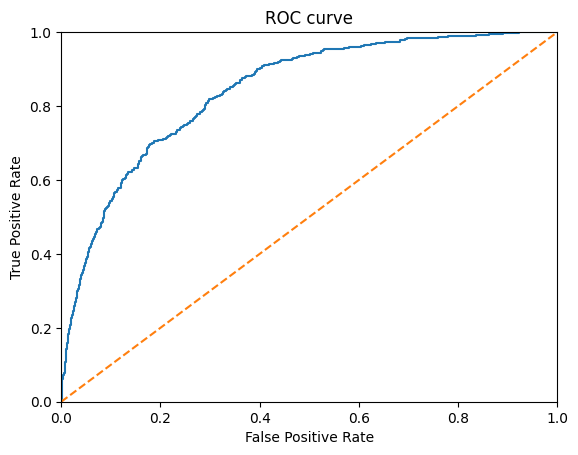

AUC using train data: 0.8422125514256497


In [225]:
#Drawing thr ROC for logistic regression

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(x_train, y_train)

probabilities_valid = model.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

# AUC (area under the curve)

auc_roc = roc_auc_score(y_valid, probabilities_one_valid)

print('AUC using train data:', auc_roc)

# Calculating the AUC

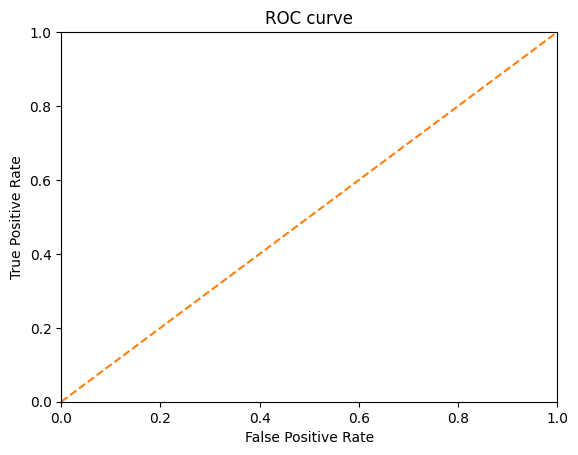

AUC using upsampled data: 1.0


In [226]:
#Drawing thr ROC for upsampled data

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(x_upsampled, y_upsampled)

probabilities_valid = model.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

# AUC (area under the curve)

upsamled_auc_roc = roc_auc_score(y_valid, probabilities_one_valid)

print('AUC using upsampled data:', upsamled_auc_roc)

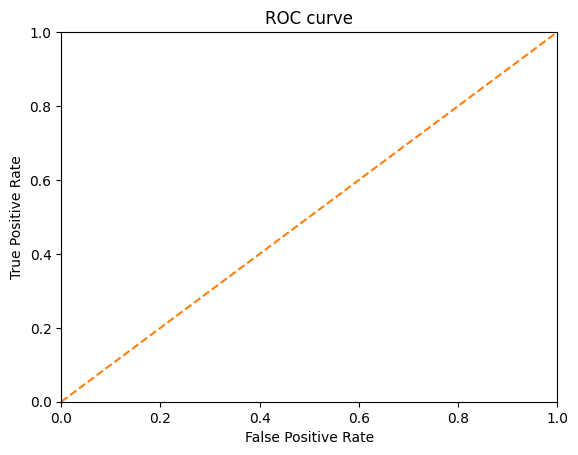

AUC using downsampled data: 1.0


In [227]:
#Drawing thr ROC for downsampled data

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)

probabilities_valid = model.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

# AUC (area under the curve)

downsampled_auc_roc = roc_auc_score(y_valid, probabilities_one_valid)

print('AUC using downsampled data:', downsampled_auc_roc)

In [228]:
print('F1 score for train data :', f1_score(y_valid, predicted_train_valid))
print('F1 score for upsampled data :', f1_score(y_valid, predicted_upsampled_valid))
print('F1 score for downsampled data:', f1_score(y_valid, predicted_downsampled_valid))

print('AUC using train data:', auc_roc)
print('AUC using upsampled data:', upsamled_auc_roc)
print('AUC using downsampled data:', downsampled_auc_roc)

F1 score for train data : 0.25625000000000003
F1 score for upsampled data : 1.0
F1 score for downsampled data: 1.0
AUC using train data: 0.8422125514256497
AUC using upsampled data: 1.0
AUC using downsampled data: 1.0


# Conculsion

1. From above, by upsampling or downsampling, the accuracy of the prediction has significantly improved to 1. And by use of this, the bank would uccessfully predict the behaviour pf the customer early enough to find ways to retain.
